https://medium.com/turing-talks/modelos-de-predi%C3%A7%C3%A3o-otimiza%C3%A7%C3%A3o-de-hiperpar%C3%A2metros-em-python-3436fc55016e

Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skopt.space import Integer
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import plotly.express as px
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
#import shap
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
df = pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/R_treino.csv', engine='python',sep=';')

In [3]:
X = df.drop('Grade', axis = 1)
y = df['Grade']

In [4]:
X

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,97.0,111.0,7.462982e+07,0.62,7.0,2.85,118.0,4.13,105.25,106.0,...,0.60,0.22,3.10,0.00,2630328.73,22.97,0.01,0.02,0.00,0.01
1,47.0,86.0,3.694742e+07,1.45,29.0,1.74,94.0,13.09,63.23,59.0,...,0.64,0.03,3.64,0.00,1585740.51,29.56,0.01,0.08,0.01,0.02
2,181.0,187.0,1.332229e+07,0.00,3.0,2.96,191.0,1.88,184.10,184.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1000000.00,0.00,0.00,0.00
3,118.0,169.0,7.066953e+08,1.58,34.0,1.96,183.0,17.73,146.49,152.0,...,3.82,0.05,5.29,0.01,1021519.59,25.06,0.00,0.52,0.00,0.02
4,163.0,174.0,9.854724e+07,0.34,7.0,2.48,181.0,3.55,168.40,169.0,...,0.30,0.06,3.56,0.01,404140.23,55.89,0.01,0.05,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,71.0,150.0,7.143713e+08,2.18,51.0,1.84,178.0,24.98,116.61,122.0,...,4.72,0.04,5.76,0.01,1435003.22,47.69,0.00,0.96,0.01,0.01
327,96.0,179.0,1.217148e+09,1.91,69.0,1.95,195.0,29.41,149.30,166.0,...,5.21,0.06,5.56,0.00,2885117.76,52.51,0.00,0.69,0.01,0.01
328,102.0,140.0,5.739570e+08,1.28,21.0,2.70,152.0,11.66,124.33,128.0,...,2.23,0.15,4.64,0.00,3490141.14,45.67,0.00,0.24,0.00,0.01
329,40.0,76.0,1.874607e+08,1.32,21.0,2.20,95.0,11.06,59.10,60.0,...,1.32,0.13,5.36,0.01,3052312.77,419.87,0.00,0.22,0.01,0.00


In [5]:
y

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
326    1.0
327    1.0
328    1.0
329    2.0
330    2.0
Name: Grade, Length: 331, dtype: float64

In [6]:
X.shape

(331, 93)

In [7]:
y.shape

(331,)

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

In [9]:
oversample = SMOTE(k_neighbors = 2)
X, y = oversample.fit_resample(X, y)

In [10]:
gnb=GaussianNB()
fit = gnb.fit(X,y)
desempenho_cross_val = cross_val_score(gnb, X, y, scoring = 'accuracy', cv = 5)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))
gnb.score(X,y)

Desempenho médio: 64.15 ± 2.7


0.6402116402116402

              precision    recall  f1-score   support

         0.0       0.93      0.67      0.78        21
         1.0       1.00      0.23      0.38        13
         2.0       0.15      0.67      0.25         3
         3.0       0.14      1.00      0.25         1

    accuracy                           0.53        38
   macro avg       0.56      0.64      0.41        38
weighted avg       0.87      0.53      0.58        38

Desempenho médio: 72.86 ± 16.34


c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


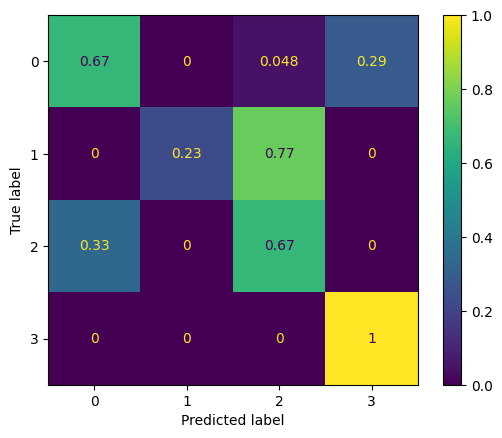

In [11]:
dft=pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/R_teste.csv', engine='python',sep=';')
Xt = dft.drop('Grade', axis =1)
yt = dft['Grade']
y_t = fit.predict(Xt)
print(classification_report(yt, y_t))


desempenho_cross_val = cross_val_score(gnb, Xt, yt, scoring = 'accuracy', cv = 5)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))
# Confusion matrix
cm = confusion_matrix(yt, y_t)
    
    # Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Display the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1,2,3])
disp.plot()
plt.show()

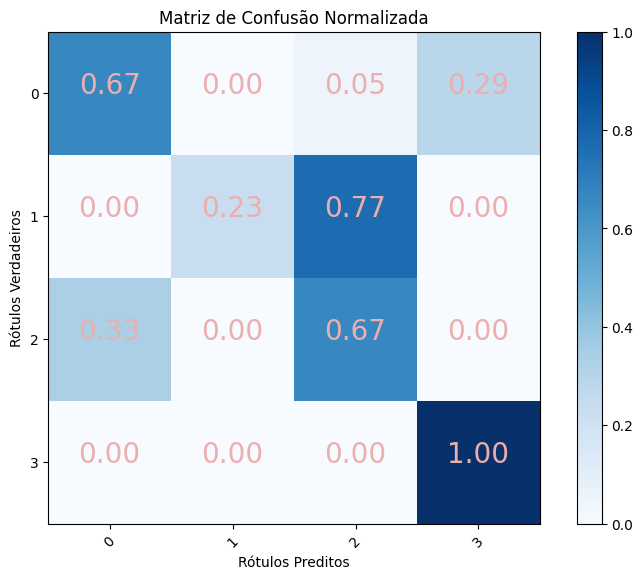

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(yt, y_t, normalize='true')

# Criar um heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão Normalizada')
plt.colorbar()

# Adicionar rótulos aos eixos
class_labels = ['0','1','2','3']  # Substitua pelos seus rótulos
# Configure o tamanho da fonte
plt.rc('font', size=20)  # Defina o tamanho da fonte desejado
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Adicionar os valores nas células
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, f"{cm[i, j]:.2f}", horizontalalignment="center", color="#ECAEAE")

plt.tight_layout()
plt.xlabel('Rótulos Preditos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()